# Importing the Ta-lib Library and yfinance

In [1]:

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2021-12-06 12:49:16--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-06 12:49:16--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-06 12:49:16--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 46.3 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
import talib as ta
import numpy as np

In [4]:
symbol = 'SBIN.NS'
start = '2017-11-12'
end = '2019-11-11'
df = yf.download(symbol,start,end)

[*********************100%***********************]  1 of 1 completed


## We will be using MACD and Bollinger Band Strategy for this code

In [5]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df = df.dropna()

In [6]:
df.dropna()

,Open,High,Low,Close,Adj Close,Volume,macd,macdsignal,macdhist
Date,,,,,,,,,
2017-12-29,310.000000,312.000000,309.049988,309.899994,307.065002,11939569,-5.264156,-6.194321,0.930165
2018-01-01,310.600006,312.750000,306.299988,307.100006,304.290649,12182400,-5.456591,-6.046775,0.590184
2018-01-02,309.000000,309.000000,301.350006,303.250000,300.475861,14797364,-5.849490,-6.007318,0.157828
2018-01-03,305.299988,306.450012,302.149994,302.850006,300.079529,13857373,-6.122272,-6.030309,-0.091963
2018-01-04,304.500000,310.200012,303.149994,308.500000,305.677826,24517099,-5.819633,-5.988174,0.168541
...,...,...,...,...,...,...,...,...,...
2019-11-04,316.000000,319.000000,312.350006,314.299988,311.424744,31535656,8.118987,1.617466,6.501521
2019-11-05,313.899994,322.000000,312.799988,319.200012,316.279938,50080853,9.840094,3.261992,6.578102
2019-11-06,318.950012,318.950012,314.000000,317.549988,314.645020,32157080,10.945981,4.798789,6.147191


In [8]:
count=-1
capital=1000
profit=[]
for a in np.arange (1,2,0.05): #This part of the for loop is for the main BB which we will use to get into the Long or Short Position
  for b in np.arange (0,1,0.05):# This is used for the target profit thing
    for c in np.arange(2, 2.5, 0.05):# This is used for the stop loss thing
      count+=1
      df['up_band'], df['mid_band'], df['low_band'] = ta.BBANDS(df['Close'], timeperiod =20,nbdevup=a, nbdevdn=a)
      df.drop('mid_band', inplace=True, axis=1)

      df.dropna()
      df['SMA']=df['Close'].mean()
      df['STD']=df['Close'].std()

      BUY = []
      SELL = []
      profittrades=0
      number_of_trades=0
      buyprice=0
      sellprice=0
      flag1=0 # For neutrality in long position
      flag2=0 #For neutrality in short position
      for i in range(8,len(df)):
        # This is the condition for getting into the long position
        # We will setup the trade when macd line is getting crossed and also when the BB gives a  signal in a duration of 3 + / - days
        if(flag1==0 and flag2==0  and df['macd'][i-4]<=df['macdsignal'][i-4]  and df['macd'][i-5]>=df['macdsignal'][i-5] and (df['Close'][i-1]<=df['low_band'][i-1] or df['Close'][i-2]<=df['low_band'][i-2] or df['Close'][i-3]<=df['low_band'][i-3] or df['Close'][i-4]<=df['low_band'][i-4] or df['Close'][i-5]<=df['low_band'][i-5] or df['Close'][i-6]<=df['low_band'][i-6] or df['Close'][i-7]<=df['low_band'][i-7] or df['Close'][i-8]<=df['low_band'][i-8] )):
          if(df['High'][i-1]>=df['Close'][i-2]):

            number_of_trades=number_of_trades+1
            BUY.append(i)
            buyprice=df['Open'][i]
            flag2=0
            flag1=1
        # This is used for squaring of the long position
        elif(flag2==0 and flag1==1 and ((df['Close'][i])>(df['SMA'][i]+ (-b)*df['STD'][i]) or (df['Close'][i])<(df['SMA'][i]- c*df['STD'][i]))):

          sellprice=df['Close'][i]
          SELL.append(i)
          profit.append(-sellprice+buyprice)
          if(sellprice>buyprice):
            profittrades+=1
          buyprice=0
          sellprice=0
          flag1=0
          flag2=0
        # This is the condition for getting into the short position
        elif(flag1 ==0 and flag2==0 and df['macd'][i-4]>=df['macdsignal'][i-4] and df['macd'][i-5]<=df['macdsignal'][i-5] and (df['Close'][i-1]>=df['up_band'][i-1] or df['Close'][i-2]>=df['up_band'][i-2] or df['Close'][i-3]>=df['up_band'][i-3] or df['Close'][i-4]>=df['up_band'][i-4] or df['Close'][i-5]>=df['up_band'][i-5] or df['Close'][i-6]>=df['up_band'][i-6] or df['Close'][i-7]>=df['up_band'][i-7] or df['Close'][i-8]>=df['up_band'][i-8]  )):
          
          if(df['Low'][i-1]<=df['Close'][i-2]):
            number_of_trades=number_of_trades+1
            SELL.append(i)  
            sell_price = df['Open'][i]
            flag2=1
            flag1=0
        # This is used for squaring of the short position
        elif(flag1==0 and flag2==1 and ((df['Close'][i])<(df['SMA'][i]+ b*df['STD'][i]) or (df['Close'][i])>(df['SMA'][i]+ c*df['STD'][i]))):
          buyprice=df['Close'][i]
          BUY.append(i)
          # SELL.append(np.nan)
          profit.append(-sellprice+buyprice)
          if(sellprice>buyprice):
            profittrades+=1
          buyprice=0
          sellprice=0
          flag1=0
          flag2=0
      # print(max(profit))
      # print('For BOllinger Band with width =  ',a,' Profit cap =  ',b,' Stop Loss = ',c,' profit is = ',profit,' and number of profittable trades are = ',profittrades)
max(profit)


Streaming output truncated to the last 5000 lines.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py

366.1499938964844

In [9]:
print(max(profit))

366.1499938964844


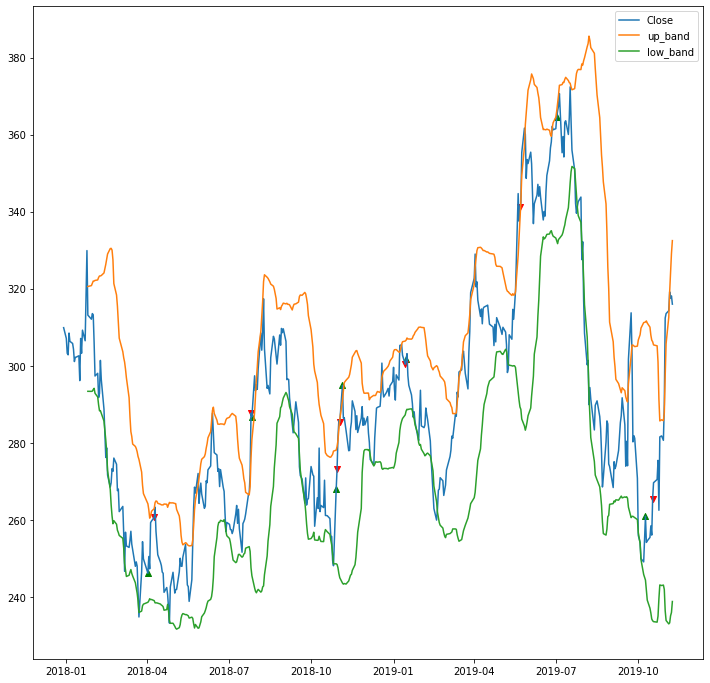

In [11]:
# The green triangle shows the buy signal and the red shows the sell signal
plt.figure(figsize=(12,12))
plt.plot(df[["Close",'up_band','low_band']])
plt.scatter(df.iloc[BUY].index,df.iloc[BUY].Close,marker = '^',color='g')
plt.scatter(df.iloc[SELL].index,df.iloc[SELL].Close,marker = 'v',color='r')
plt.legend(["Close",'up_band','low_band'])
plt.show()

Text(0, 0.5, 'Price')

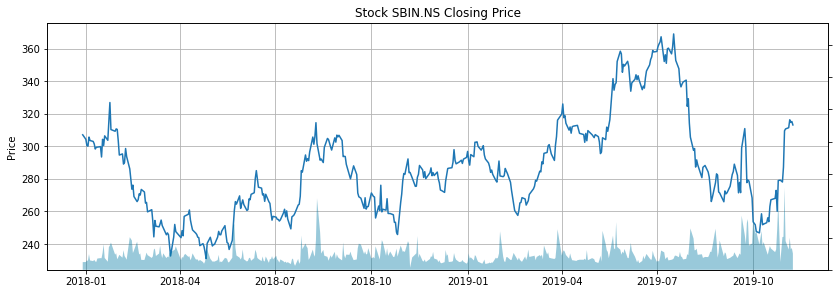

In [13]:
fig0 = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.grid()
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
No handles with labels found to put in legend.


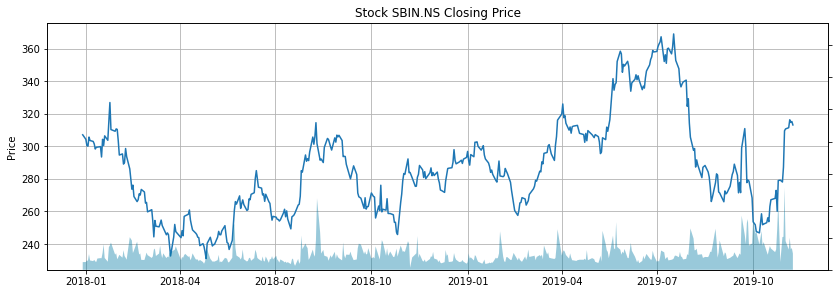

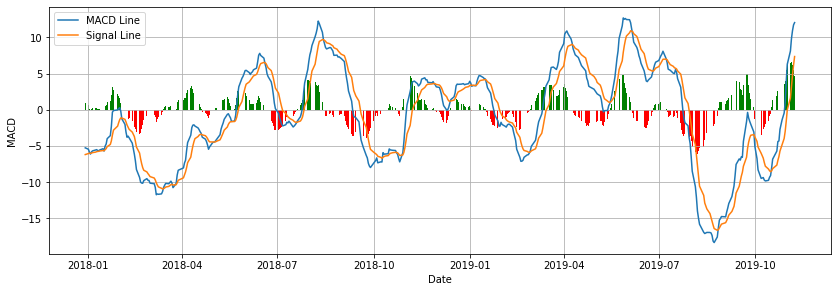

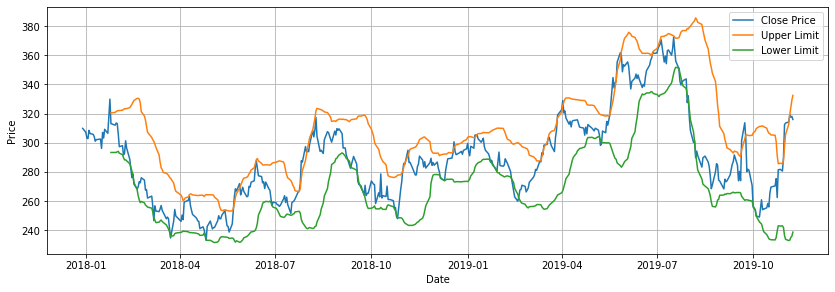

In [14]:
fig0 = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.grid()
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
fig = plt.figure(figsize=(14,10))
labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
df['positive'] = df['macdhist'] > 0
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], color=df.positive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_ylabel('MACD')
ax2.set_xlabel('Date')
ax2.legend(loc='best')
ax2.legend(['MACD Line','Signal Line'])
fig1 = plt.figure(figsize=(14,10))
ax3 = plt.subplot(2, 1, 2)
ax3.plot(df[['Close','up_band','low_band']])
ax3.set_ylabel('Price')
ax3.set_xlabel('Date')
ax3.grid()
ax3.legend(loc='best')
ax3.legend(['Close Price','Upper Limit','Lower Limit'])